# Deep Learning - Regression Example
I demonstrate the use of Deep Learning with Keras. Models with Scikit-learn are created as well for demonstration. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import load_model

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

c:\Users\quo\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


# Data

In [2]:
data = load_diabetes()
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [3]:
X, y = load_diabetes(return_X_y=True, as_frame=True)

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# EDA

In [5]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [6]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


# Modelling the data

In [8]:
n_cols = X_train.shape[1]
n_cols

10

## Creating two neural networks with Keras

In [9]:
model_1 = Sequential()
# Dense layer means that each node is connected to the nodes in the previous layer
model_1.add(Dense(10, activation = 'relu', input_shape = (n_cols, )))
model_1.add(Dense(10, activation = 'relu'))
model_1.add(Dense(1))

model_1.compile(optimizer = 'adam', loss = 'mean_squared_error')

early_stopping_monitor = EarlyStopping(patience = 2)
model_1_trained = model_1.fit(X_train, y_train, validation_split = 0.2, epochs = 50, callbacks = [early_stopping_monitor], verbose = False)

c:\Users\quo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model_2 = Sequential()
model_2.add(Dense(100, activation = 'relu', input_shape = (n_cols, )))
model_2.add(keras.layers.Dropout(0.50))
model_2.add(Dense(10, activation = 'relu'))
model_2.add(Dense(10, activation = 'relu'))
model_2.add(Dense(1))

model_2.compile(optimizer = 'adam', loss = 'mean_squared_error')

early_stopping_monitor = EarlyStopping(patience = 2)
model_2_trained = model_2.fit(X_train, y_train, validation_split = 0.2, epochs = 50, callbacks = [early_stopping_monitor])

c:\Users\quo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 31516.3359 - val_loss: 22471.6309
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 31491.0957 - val_loss: 22444.2188
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 31453.0957 - val_loss: 22405.3203
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 31396.1836 - val_loss: 22351.5195
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 31318.2988 - val_loss: 22276.7520
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 31211.4824 - val_loss: 22172.6621
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 31065.4707 - val_loss: 22029.1074
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 30852.4746 - val_loss: 21831.4570
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 30565.8789 - val_loss: 21562.6445
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 30179.2656 - val_loss: 21204.1895
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 29682.6523 - val_loss: 20737.82

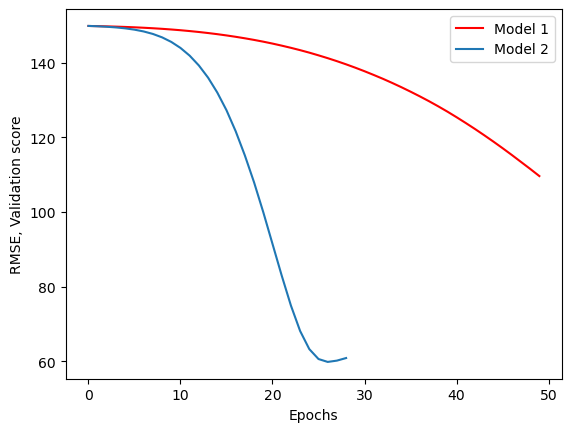

In [11]:
plt.plot(np.sqrt(model_1_trained.history['val_loss']), 'r', label='Model 1')
plt.plot(np.sqrt(model_2_trained.history['val_loss']), label='Model 2')
plt.xlabel('Epochs')
plt.ylabel('RMSE, Validation score')
plt.legend()

## Creating two models with Scikit-learn

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
random_forest = RandomForestRegressor()
param_grid = { 
    'n_estimators': [10, 50, 100],
    'max_depth' : [1, 2, 5, 10],
}
cv_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv= 5)
cv_rf.fit(X_train, y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [1, 2, ...], 'n_estimators': [10, 50, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [14]:
# pd.DataFrame(cv_rf.cv_results_)

# Compare the 4 models on the validation data

In [15]:
y_pred_m1 = model_1.predict(X_val)
y_pred_m2 = model_2.predict(X_val)
y_pred_lin_reg = lin_reg.predict(X_val)
y_pred_rf = cv_rf.predict(X_val)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


In [16]:
# Caluclate RMSE for each model and see which one is best
print(mean_squared_error(y_pred_m1, y_val))
print(mean_squared_error(y_pred_m2, y_val))
print(mean_squared_error(y_pred_lin_reg, y_val))
print(mean_squared_error(y_pred_rf, y_val))

14752.283653663628
3599.478645049179
2900.193628493482
3013.5734599246675


# Demonstration that you can load/save models
Training complex models on large datasets can take alot of time. Fortunately you can save and then load them.

In [17]:
model_2.save('model_file.h5')

In [18]:
my_model = load_model('model_file.h5')

In [19]:
predictions = my_model.predict(X_val)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000016D57F7B380> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [20]:
# We get the same result as above
print(mean_squared_error(predictions, y_val))

3599.478645049179
